<a href="https://colab.research.google.com/github/UmangWasekar/Seoul-Bike-Sharing/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the modules required for the data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        #for data visualisation
%matplotlib inline
import seaborn as sns                  #for data visualisation

In [ ]:
from datetime import datetime          #Importing datetime for correctly formatting the date 
import datetime as dt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.preprocessing import OneHotEncoder               #Encodes categorical features as one hot numeric array
from sklearn.preprocessing import MultiLabelBinarizer         #Transform between iterable of iterables and a multilabel format
from sklearn.preprocessing import MinMaxScaler                #Rescales the feature in default rage of 0-1 (Normalisation Purposes)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score                         #This metric compares current model with constant baseline and tells why our model is better (Range 0-1)
from sklearn.metrics import mean_squared_error               #It is simply the average of the squared difference between the target value and the value predicted by the regression model. 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error              # difference between the target value and the value predicted by the model.
from sklearn.metrics import log_loss

In [ ]:
import warnings
warnings.filterwarnings('ignore')                            #Used to alert the user for some sort of condition occured in the program

# **Mounting the Drive and Importing the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the CSV Dataset

Bike_Sharing_df=pd.read_csv('/content/drive/MyDrive/Capstone Project 2 (Umang Wasekar)/Copy of SeoulBikeData.csv', encoding = 'latin')

# (encoding ='latin' is used to solve UnicodeDecodeError / Maps all possible byte values to first 256 Unicode code)

# **Reviewing The Dataset**

In [ ]:
Bike_Sharing_df.shape          # shape helps us to find the size of the data

(8760, 14)

In [ ]:
Bike_Sharing_df.head()         # provides 1st 5 observations by default 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
Bike_Sharing_df.tail()                  # provides last 5 observations by default 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Getting all the features of dataset

print(f"Features of the dataset: {Bike_Sharing_df.columns}")

Features of the dataset: Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
# Detalied Information about Dataset

Bike_Sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
Bike_Sharing_df.describe().T       # .T after describe basically works as transpose

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
Bike_Sharing_df.nunique()           #Provides the user with total number of unique values of features

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# **Features Breakdown**

**Date := 365 days duration starts from 01/12/2017 to 30/11/2018, so for formating in DD/MM/YYYY, type : str, we need to convert into datetime format.**

**Rented Bike Count : Our dependent variable is total number of bikes rented per hour and also we need to predict that, type : int.**

**Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.**

**Temperature(°C): Temperature in Celsius, type : Float**

**Humidity(%): Humidity in the air is in %, type : int**

**Wind speed (m/s) : Speed of the wind is in m/s, type : Float**

**Visibility (10m): Visibility is in m, type : int**

**Dew point temperature(°C): Temperature at the beggining of the day, type : Float**

**Solar Radiation (MJ/m2): Sun contribution, type : Float**

**Rainfall(mm): Amount of raining in mm, type : Float**

**Snowfall (cm): Amount of snowing in cm, type : Float**

**Seasons: Season of the year, type : str, there are only 4 season's in data .**

**Holiday: If the day is holiday period or not, type: str**

**Functioning Day: If the day is a Functioning Day or not, type : str**

# **Cleaning and Processing of Data**



*   The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data.
*   The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values that's why we check missing values first.




In [ ]:
print(Bike_Sharing_df.isna().sum())             # Both isna() and isnull() are used to DETECT the MISSSING VALUES.
print(Bike_Sharing_df.isnull().sum())           # Both returns, Mask of bool values for each element in DataFrame that indicates whether an element is an NA value.

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [ ]:
Bike_Sharing_df.shape[0]           #Gives total number of rows/observations
Bike_Sharing_df.shape[1]           ##Gives total number of columns/features 
print(f"{Bike_Sharing_df.shape[0]}")
print(f"{Bike_Sharing_df.shape[1]}")                  

8760
14


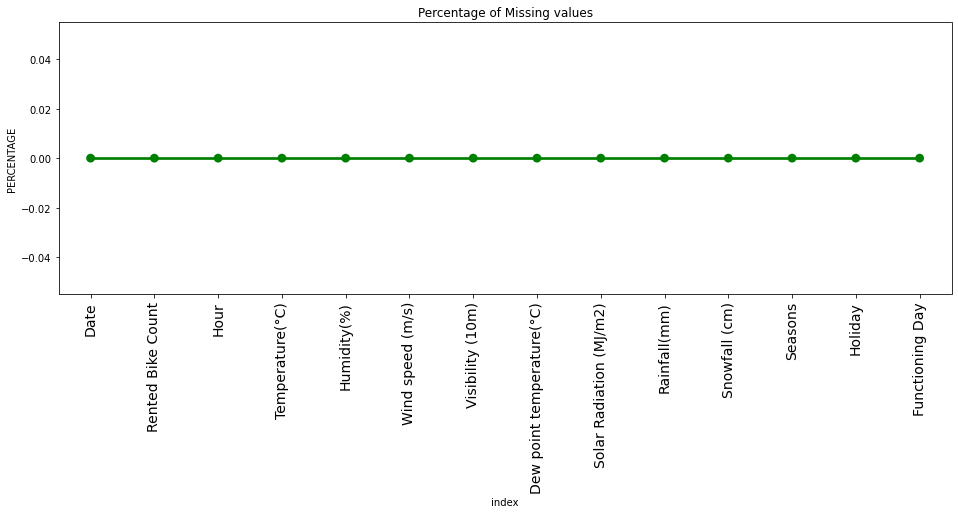

In [ ]:
missing = pd.DataFrame((Bike_Sharing_df.isnull().sum())*100/Bike_Sharing_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing , color= "green")
plt.xticks(rotation =90,fontsize =14)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**As there aren't any NULL values present in the given dataset we can proceed further.**

# **Now, finding the Duplicate values if there are any present in the dataset and removing them.**

**Treating Duplicate values is very important as not doing so can result in overspending of time and money.**
**So,by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.**

In [ ]:
value=len(Bike_Sharing_df[Bike_Sharing_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**Hence, the given dataset does not have any duplicate values.**

# **Now, Organizing Date Column.**

In [ ]:
# Breaking the date into Year, Month and Day, and creating indivisual column for them.

Bike_Sharing_df['Date'] = Bike_Sharing_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
Bike_Sharing_df['year'] = Bike_Sharing_df['Date'].dt.year
Bike_Sharing_df['month'] = Bike_Sharing_df['Date'].dt.month
Bike_Sharing_df['day'] = Bike_Sharing_df['Date'].dt.day_name()          # day_name() gives actual name of days


In [ ]:
Bike_Sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [ ]:
# Creating another column to find out weekdays and weekend trend 
Bike_Sharing_df['weekdays_weekend']=Bike_Sharing_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [ ]:
# Now dropping the unecessary columns.

Bike_Sharing_df = Bike_Sharing_df.drop (columns=['Date','day','year'],axis=1)


In [ ]:
Bike_Sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [ ]:
Bike_Sharing_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
Bike_Sharing_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

# **Transforming Data Types In Correct Format**




*   Month, Hour and Weekdays_Weekend are described as intger type datatype , but actually they are category data type.
*  If this is not treated now then it will produce error in near future in the analysis.
*  So, we need  to convert them in category data type.

In [ ]:
columns=['Hour','month','weekdays_weekend']
for columns in columns:
  Bike_Sharing_df[columns]=Bike_Sharing_df[columns].astype('category')

In [ ]:
Bike_Sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

# **Exploratory Data Analysis**



*  **EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists.**
* **It performs to define and refine our important features variable selection, that will be used in our model.**
* **Once EDA is complete and insights are drawn, its feature can be used for supervised and unsupervised machine learning modelling.**
*  **The EDA is executed majorly by Uni-variate visualization, Bi-variate visualization, Multivariate Visualization and Dimensionality reduction.**



# **Univariate Analysis**
**The key objective of Univariate analysis is to simply describe the data to find patterns within the data.**

# **Knowing The Dependent Variable**

Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot. First we analyze the category data tyep then we proceed with the numerical data type.

In [ ]:
Bike_Sharing_df.columns


Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

[Text(0.5, 1.0, 'Numbers of Bikes Rented Monthly')]

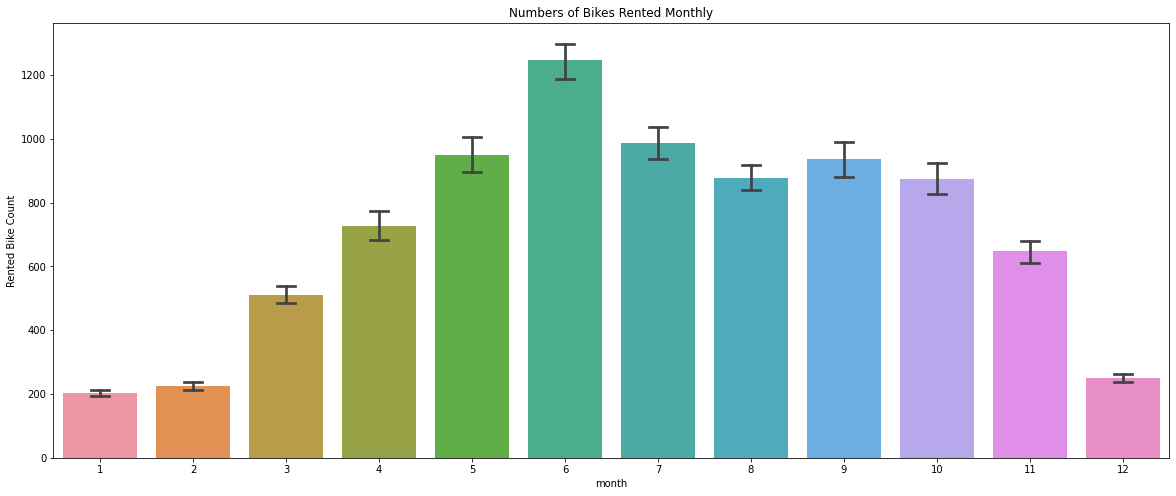

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike_Sharing_df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Numbers of Bikes Rented Monthly')

***From the above Bar chart it can be clearly stated that the numbers of bike rented were comparitively higher from May to October with June been the month where most numbers of bikes rented.***

# **Comparing Weekdays and Weekend performance**

[Text(0.5, 1.0, 'Bikes rented during weekdays and weekend')]

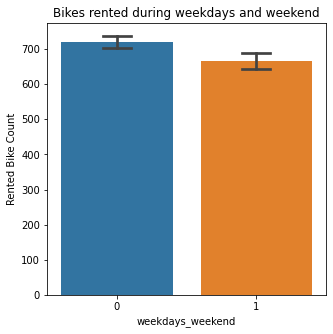

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=Bike_Sharing_df, x='weekdays_weekend',y='Rented Bike Count', ax=ax,capsize=.2)
ax.set(title='Bikes rented during weekdays and weekend')

# **Hourly Analysis**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

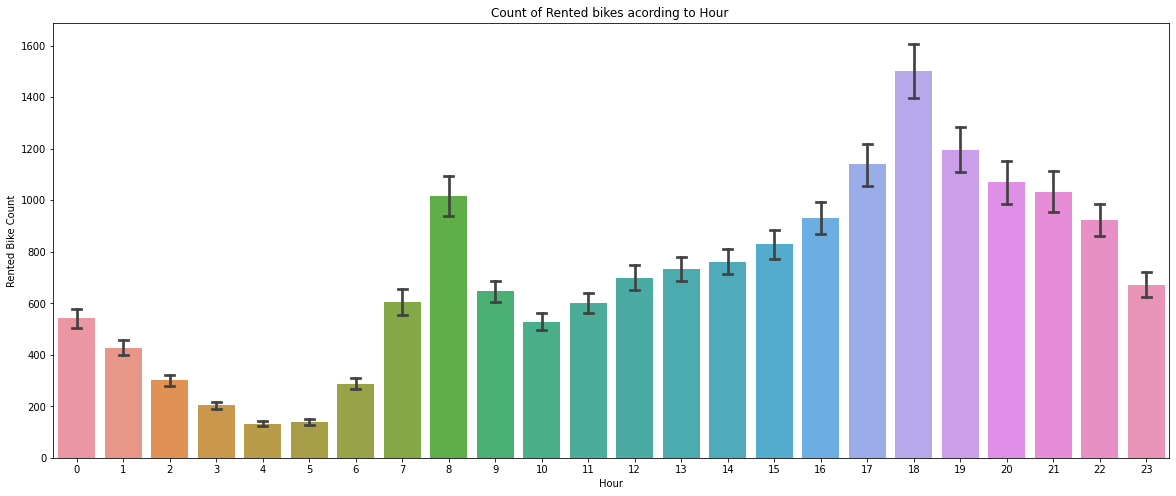

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike_Sharing_df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

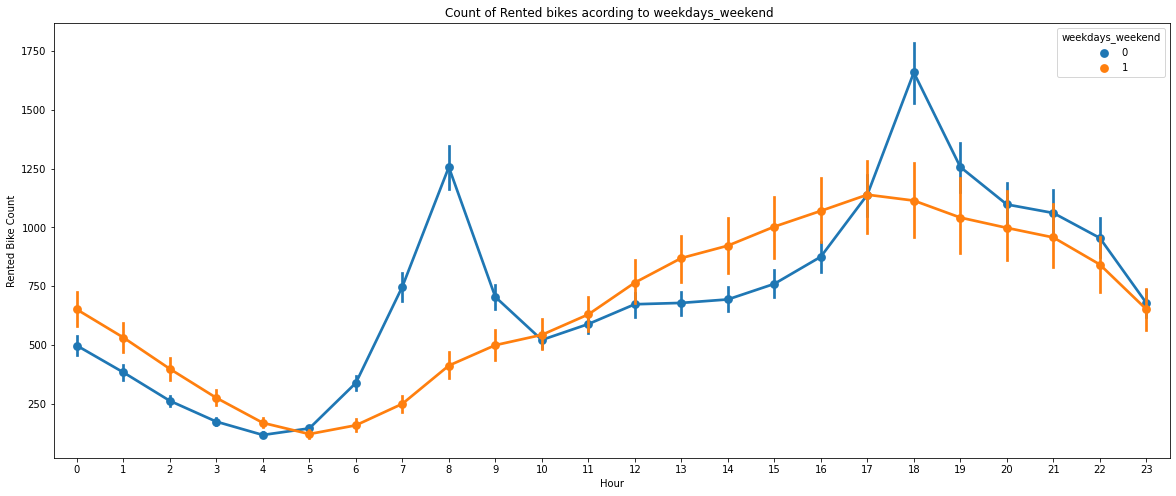

In [ ]:
# Comparing hourly trend of Weekdays and Weekend

fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=Bike_Sharing_df,x='Hour',y='Rented Bike Count',hue='weekdays_weekend')
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')



*   From the above pointplot we can see that 7-9 are peak hours in a day followed by 17-20.
*   Blue line indicates weekdays so higher demand during 7-9am must be because of office hours.
*   Demand gradually increases from 5pm to 6:30pm



# **Season wise analysis**

[Text(0.5, 1.0, 'Season wise demand of Rented Bikes ')]

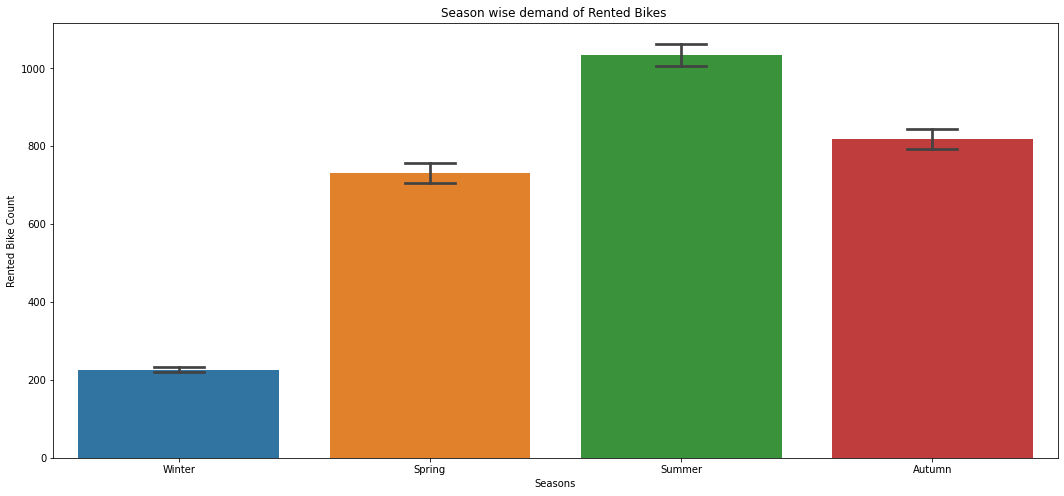

In [ ]:
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=Bike_Sharing_df , x='Seasons',y='Rented Bike Count', ax=ax, capsize = .2)
ax.set(title='Season wise demand of Rented Bikes ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

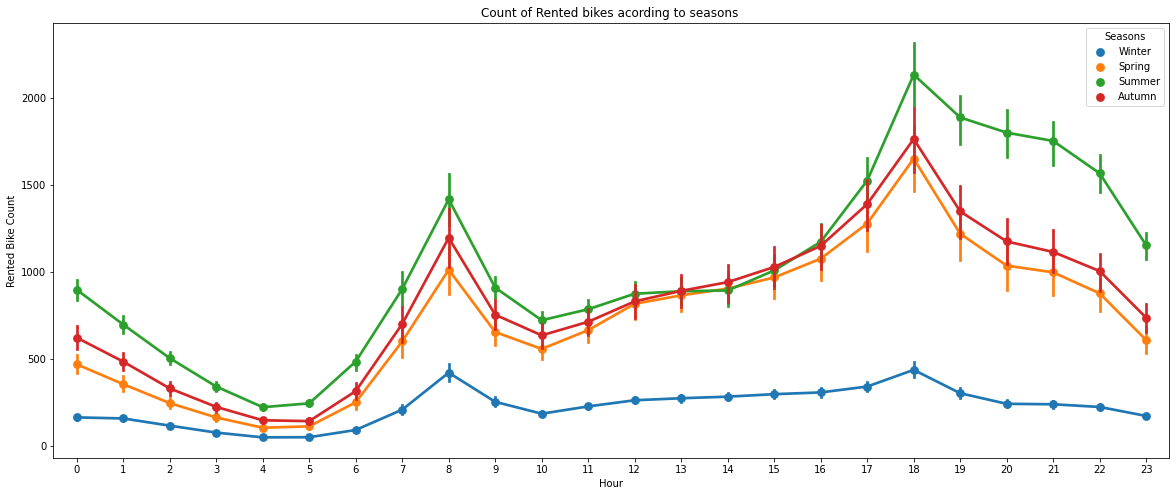

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=Bike_Sharing_df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)      #hue = basically a parameter to decide on which basis we need to compare our data an plit
ax.set(title='Count of Rented bikes acording to seasons ')



*   Demand for bike is most During Summer season, whilst this demand exponentially decreases in Winter.
*   7-9 during day and 5-7 in the evening are the hours where Bike demand is at the peak, this trend is common for almost all seasons.
*   This decline in demand during winter season mmaybe because of bad weather condition, heavy snowfall etc.



# **Demand during Normal Days and Holidays**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

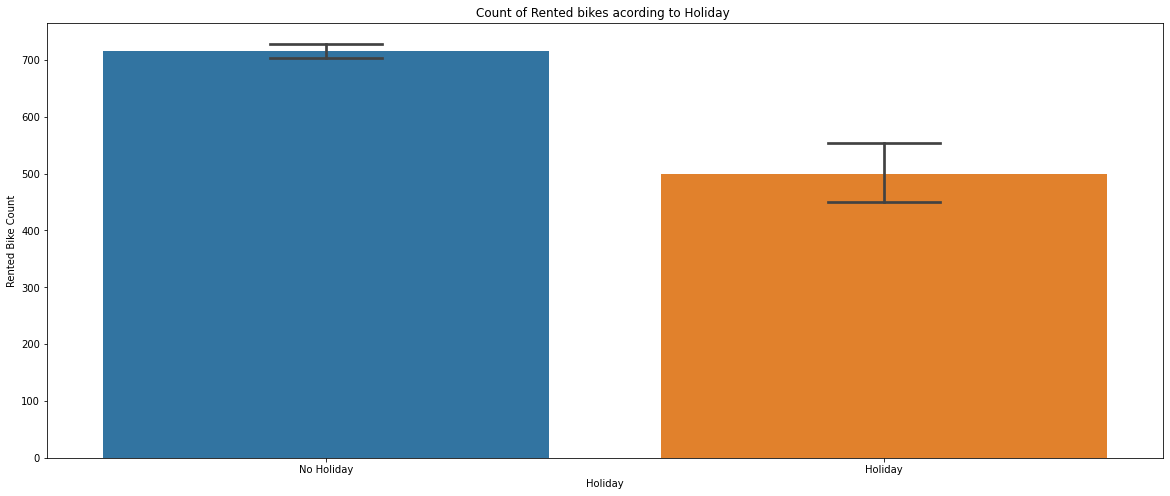

In [ ]:
fig,ax=plt.subplots(figsize=(20 ,8))
sns.barplot(data=Bike_Sharing_df ,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

# **Numerical Data Analysis**

**Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.**

In [ ]:
# Organizing Numerical Columns by assigning them to variate

numerical_columns=list(Bike_Sharing_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

**Then, creating Distplots for the comparisons of all the numerical features.**

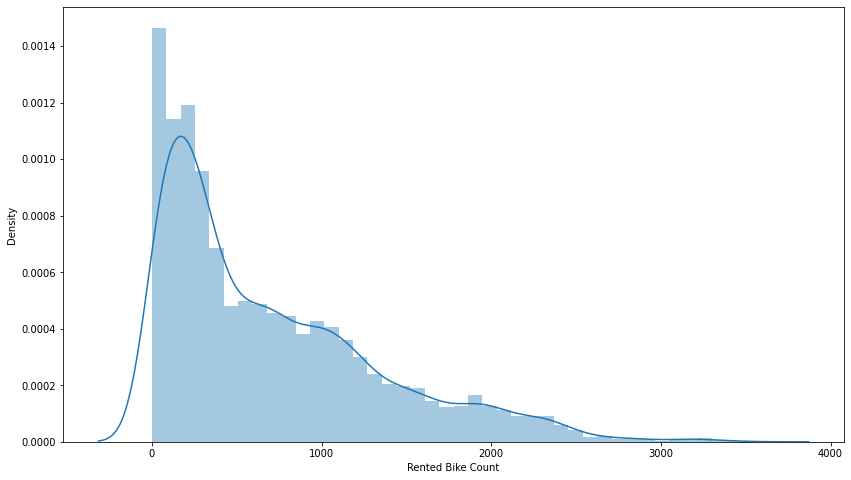

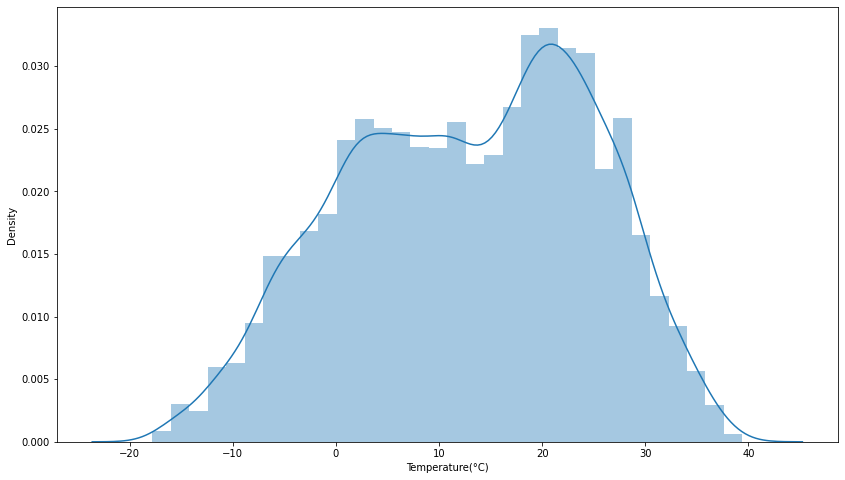

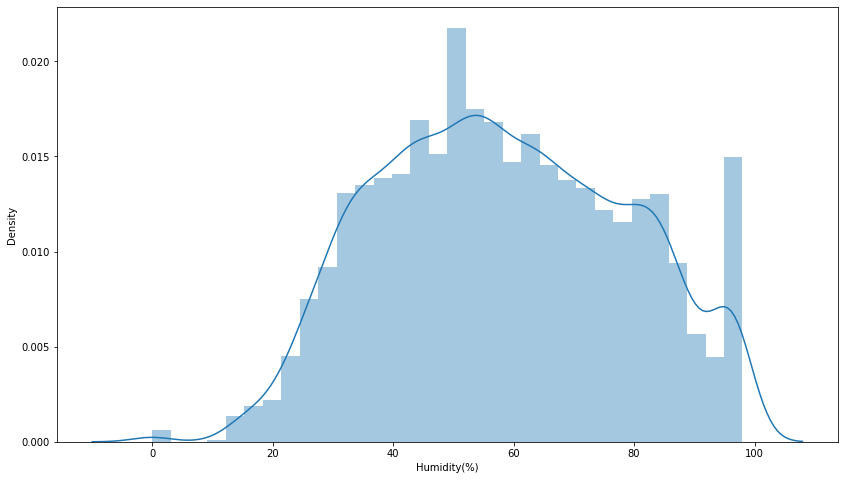

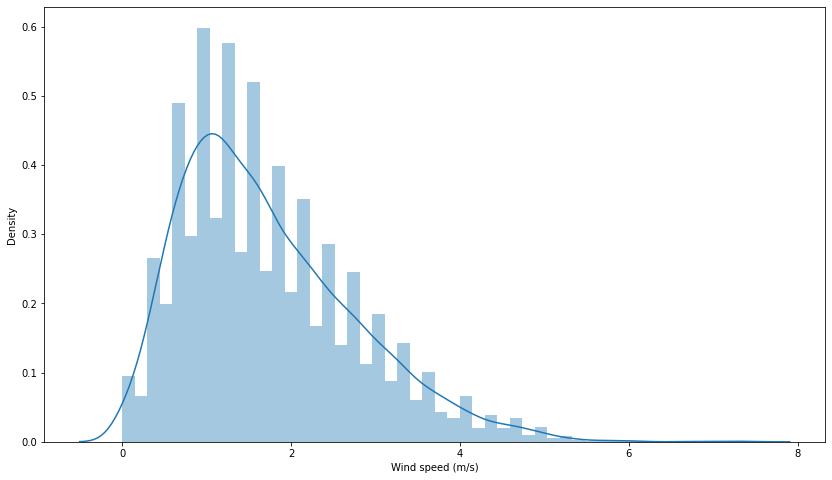

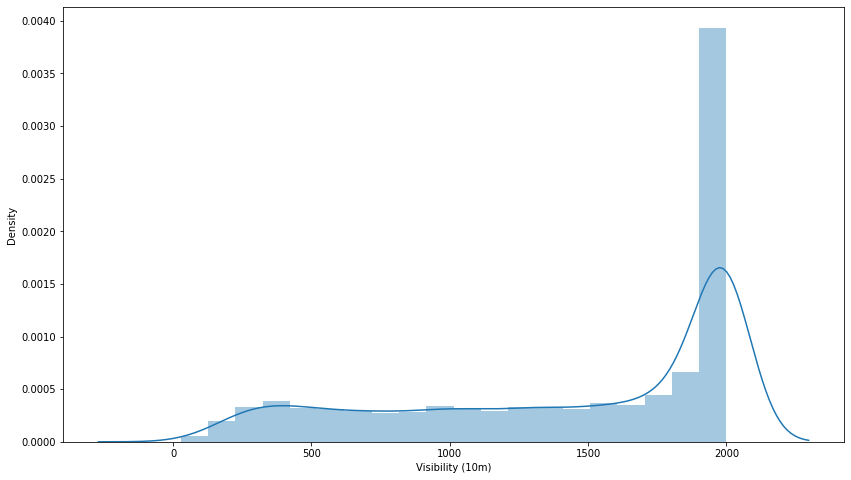

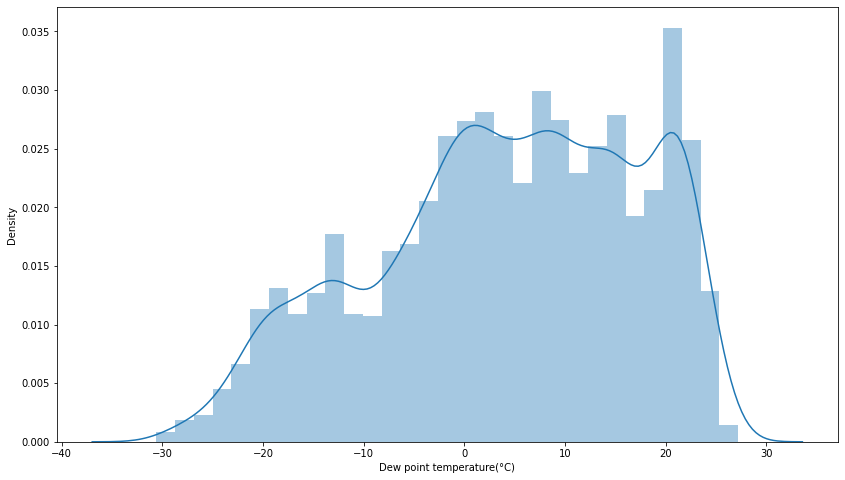

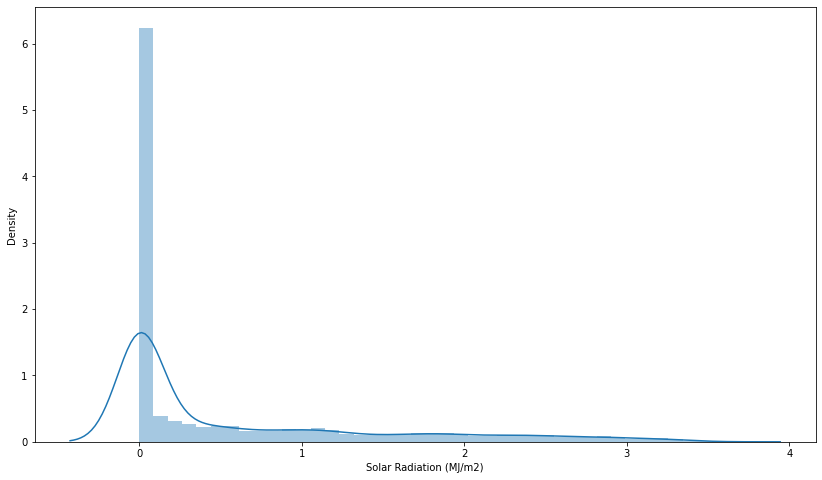

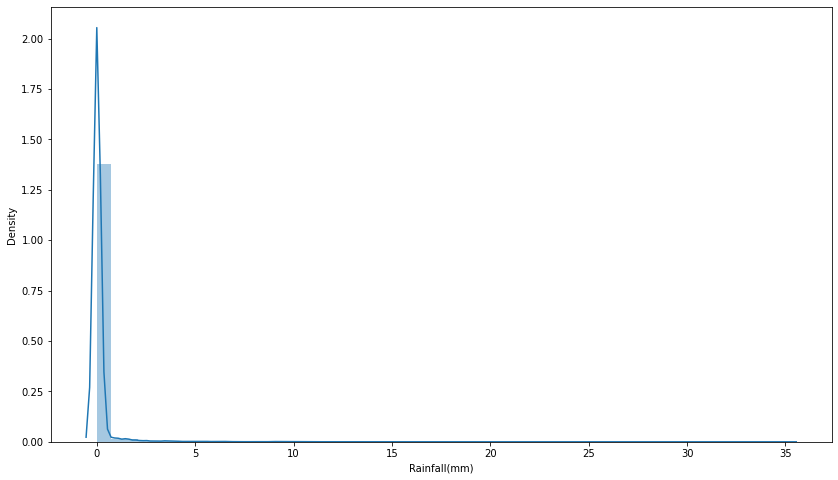

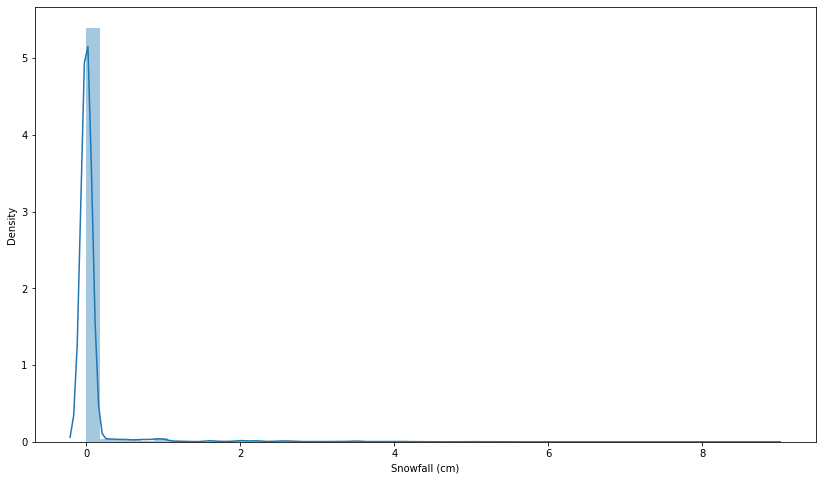

In [ ]:
for col in numerical_features:
  plt.figure(figsize=(14,8))
  sns.distplot(x=Bike_Sharing_df[col])
  plt.xlabel(col)
plt.show()

# **Finding correlation between rented bike and temprature to understand how does it affect the business.**

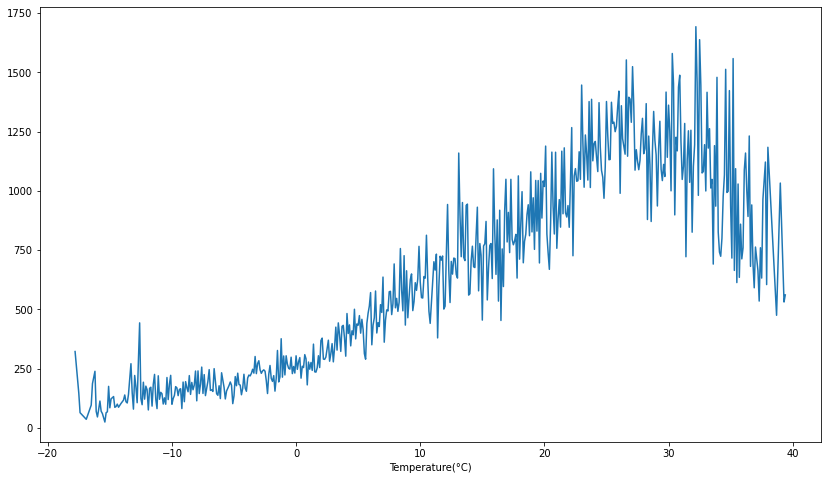

In [ ]:
plt.figure(figsize=(14,8))
Bike_Sharing_df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

**It can be stated from the above plot that people usually rent bike when  temprature is often between 25 - 26 on an average**


# **Dew Factor**

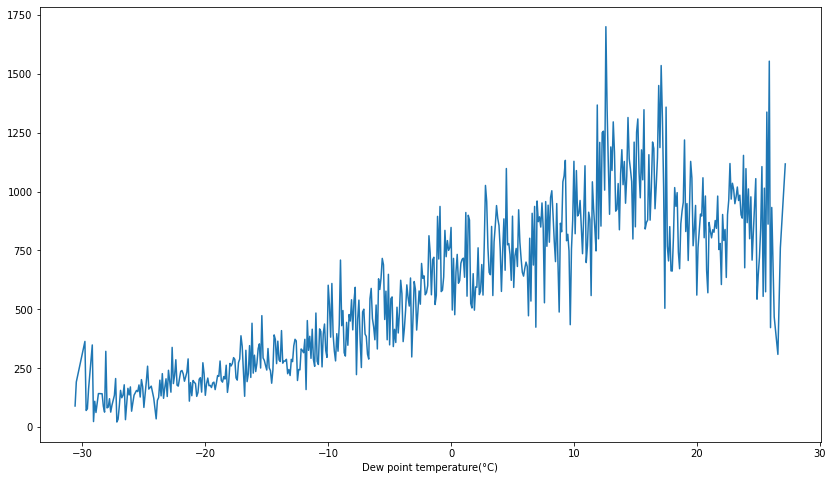

In [ ]:
plt.figure(figsize=(14,8))
Bike_Sharing_df.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()

**Effect of dew on business is almost identical to that of temprature.**

# **Solar Radiation**

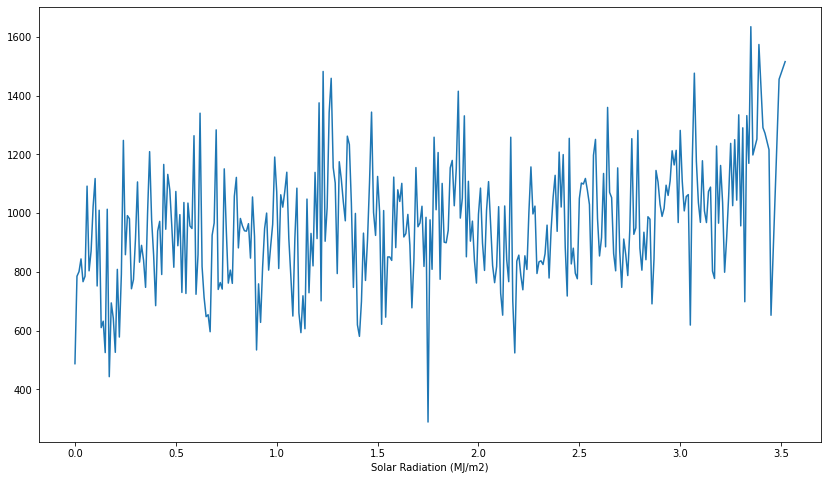

In [ ]:
plt.figure(figsize=(14,8))
Bike_Sharing_df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

**From the above plot we can say that number of bikes rentend gradually increases as solar radiation**.

# **Snowfall**

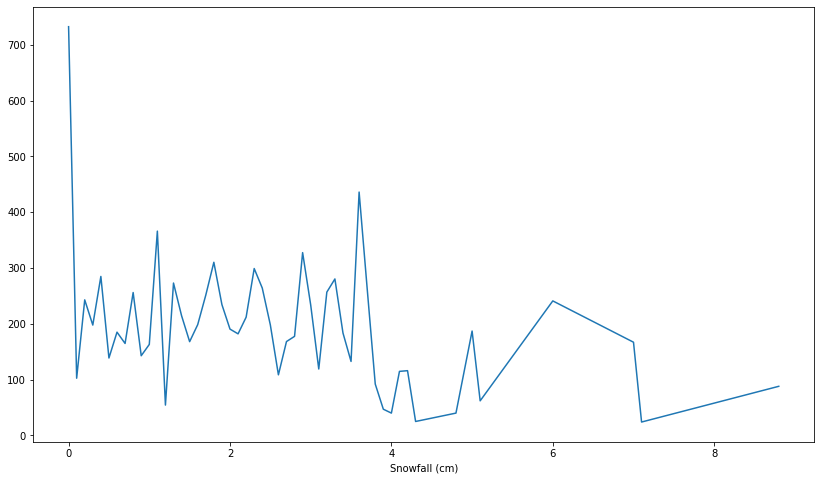

In [ ]:
plt.figure(figsize=(14,8))
Bike_Sharing_df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

**It can be clearly seen that snowfall can heavily affect the business. Whenever, there is heavy snowfall i.e. above 4cm the amot of bikes rented drops.**

# **Rainfall**

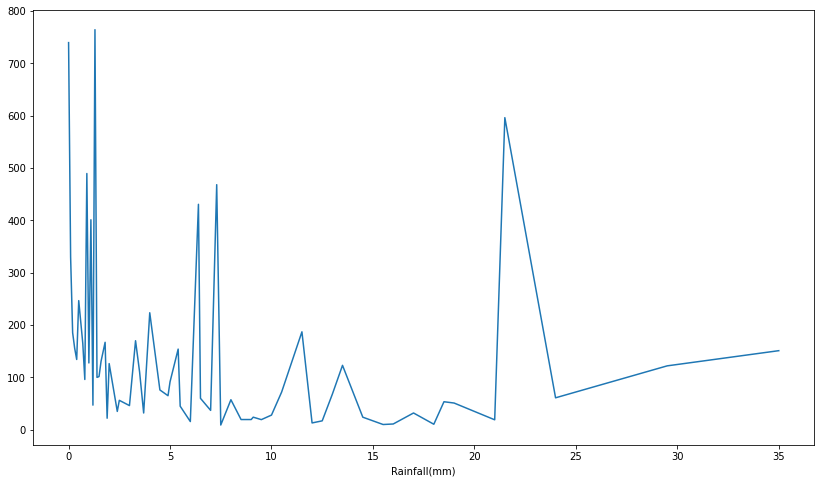

In [ ]:
plt.figure(figsize=(14,8))
Bike_Sharing_df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

**from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes**

# **Wind_speed**

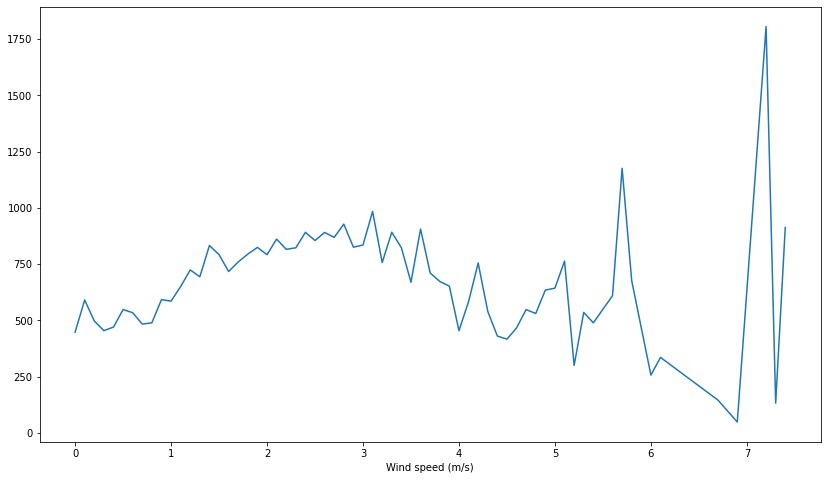

In [ ]:
plt.figure(figsize=(14,8))
Bike_Sharing_df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

**Distribution of bike rented is almost uniform until the wind speed starts increasing above 6m/s and there is exponential rise in bike rented when the speed is 7 m/s**

# **REGRESSION**



*   **The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.**
*   **Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.** 



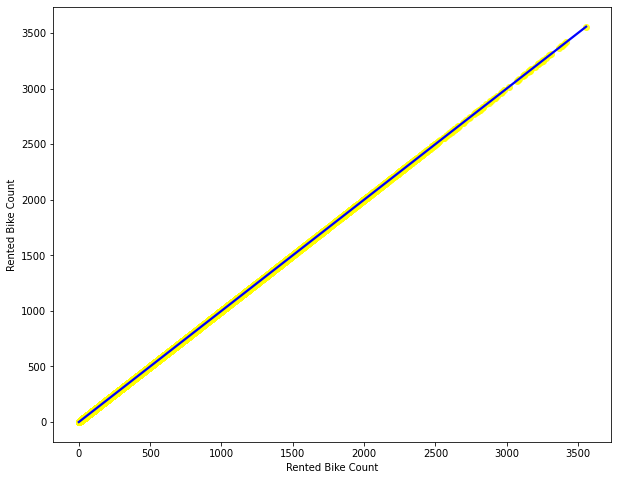

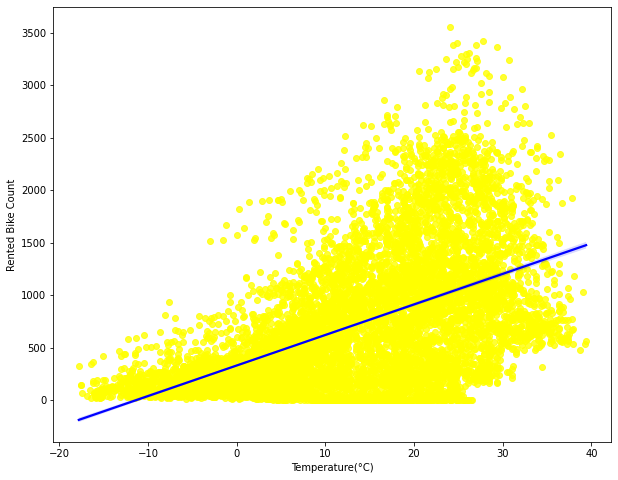

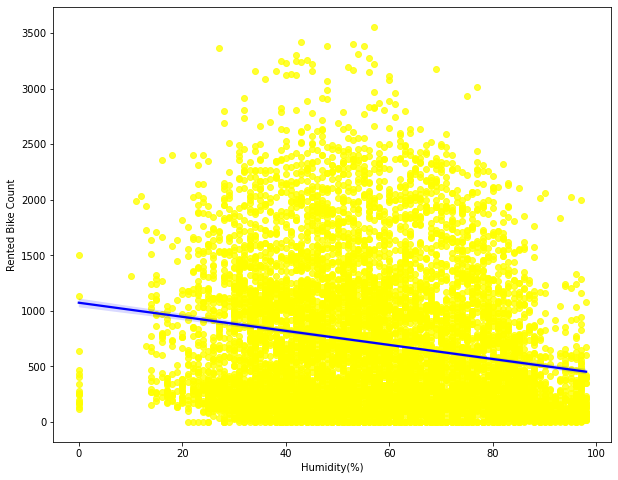

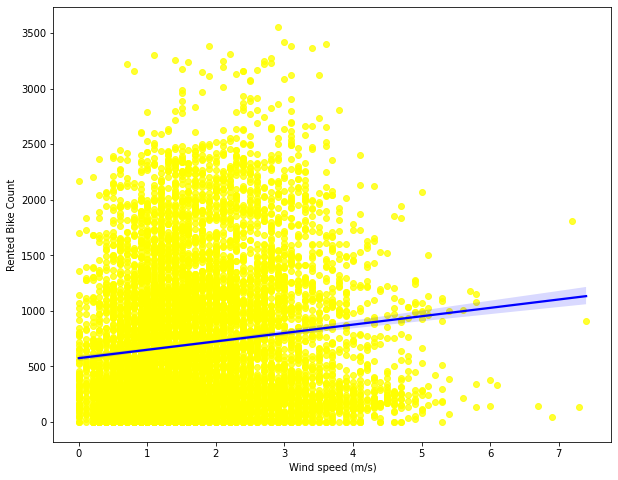

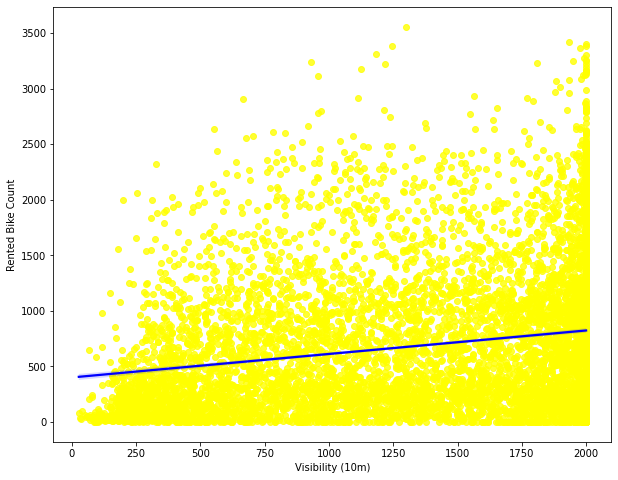

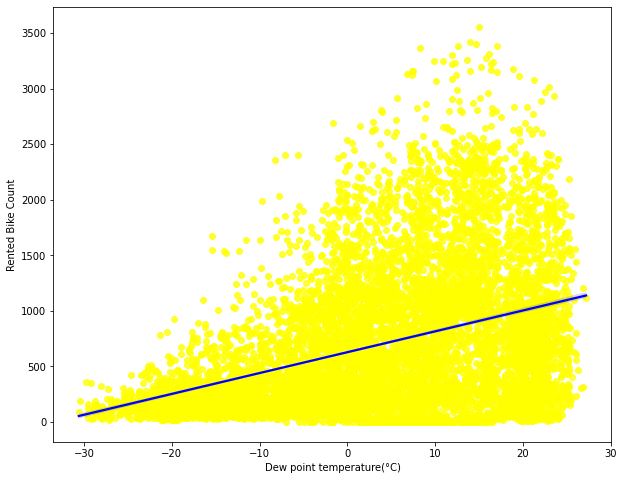

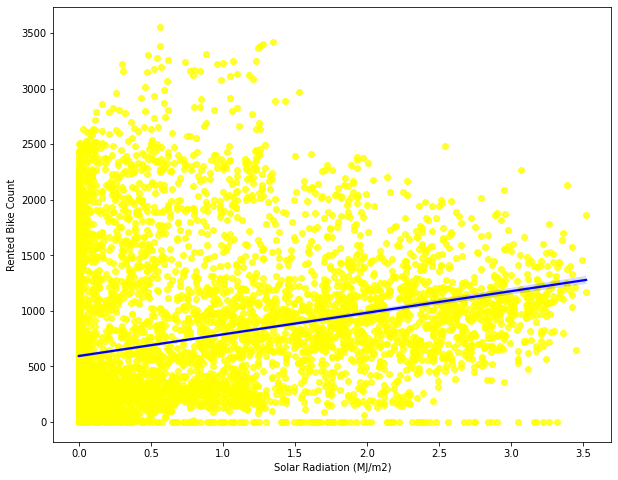

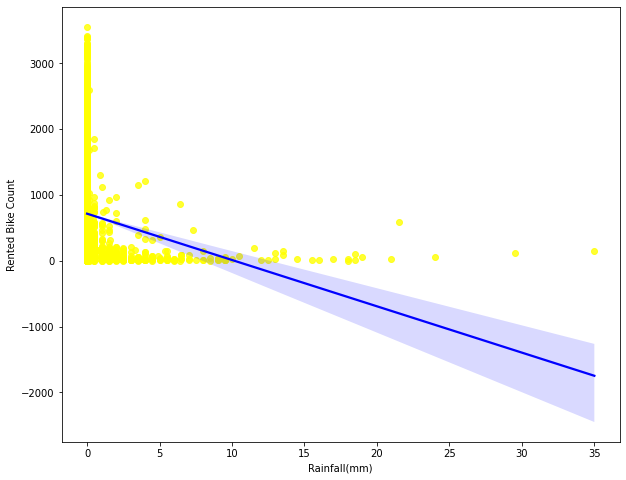

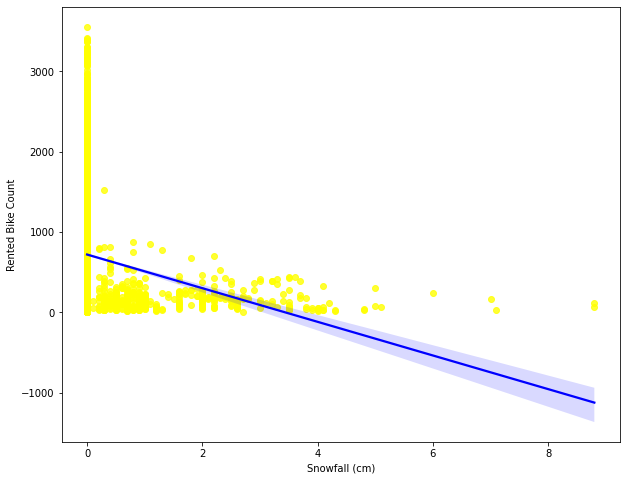

In [ ]:
for column in numerical_features:
  fig,ax=plt.subplots(figsize=(10,8))
  sns.regplot(x=Bike_Sharing_df[column],y=Bike_Sharing_df['Rented Bike Count'],scatter_kws={"color": 'yellow'}, line_kws={"color": "blue"})



* **Above are the Regression plots for all the numerical features in dataset.**


*  **It can be seen that the 'Temperature','Dew point temperature' 'Solar Radiation' 'Wind speed','Visibility' are positively related to target variable and hence this means that The rented Bike numbers will increase with increase in these features**

*   **Whilst, features like Rainfall, Snowfall and Humidity were negatively related with the target variable. This means that theses features are inversly proportional to the target variable and the number of rented bike will decrease with increase in these features.**



# **NORMALIZATION**



*   **The notion of regularization is simply a useful technique to use when we think our model is too complex (models that have low bias, but high variance).**

*   **The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data**



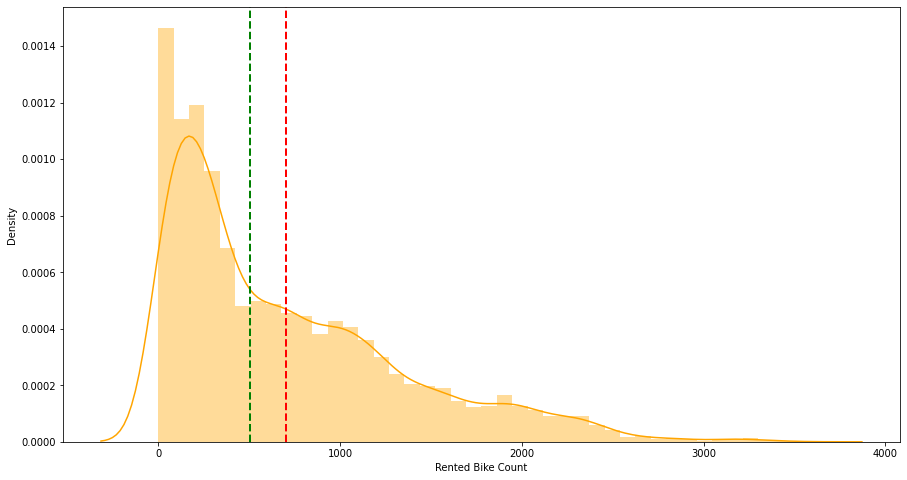

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(Bike_Sharing_df['Rented Bike Count'],hist=True ,color="orange")
ax.axvline(Bike_Sharing_df['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(Bike_Sharing_df['Rented Bike Count'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()


**The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**

**Plotting a Box Plot for verifying if there are any outliers present in Rented Bike Count**

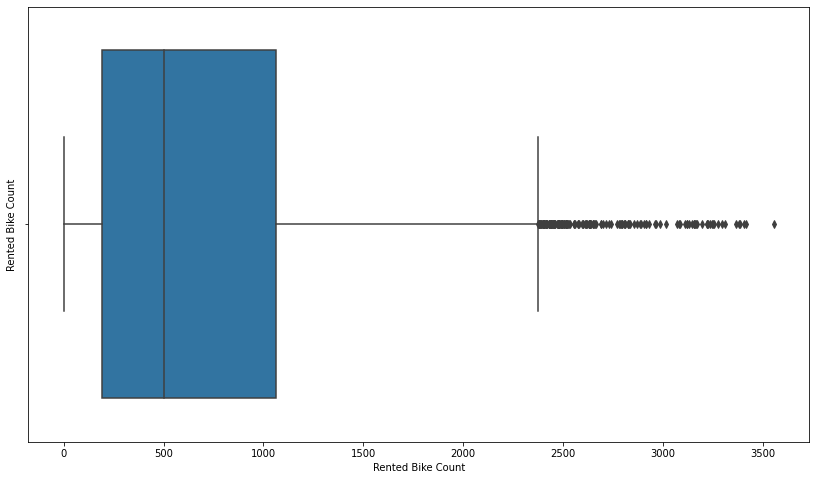

In [ ]:
plt.figure(figsize=(14,8))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=Bike_Sharing_df['Rented Bike Count'])
plt.show()

**Above Box Plot explains that we do have numerous outliers present in Rented Bike Count, and we'll need to treat them.**

**We'll apply square root method to Rented Bike Count to normalize the skewness thereby improving it and also treating the outliers.**

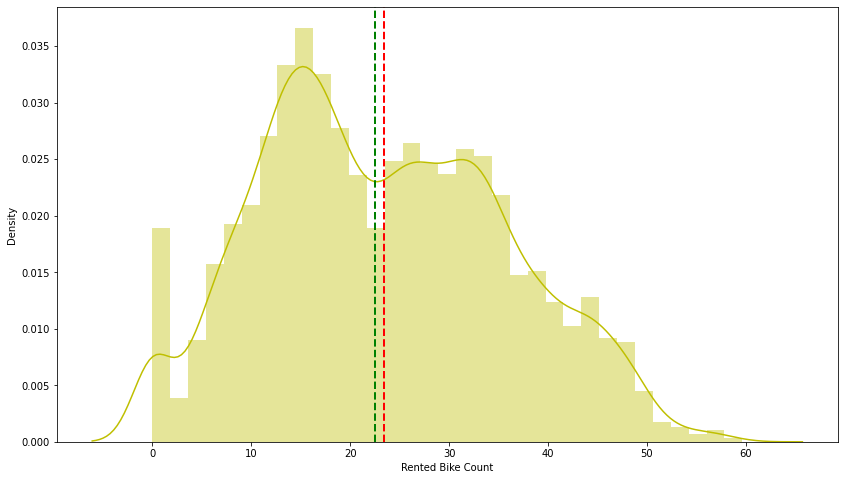

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(14,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(Bike_Sharing_df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(Bike_Sharing_df['Rented Bike Count']).mean(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(Bike_Sharing_df['Rented Bike Count']).median(), color='green', linestyle='dashed', linewidth=2)

plt.show()

**From the above distplot we can clearly see that after applying square root method, it treated the skewness and normalized it.**

**Now,  we'll check if there are still any outliers prent in Rented Bike Count after applying Square root to it**

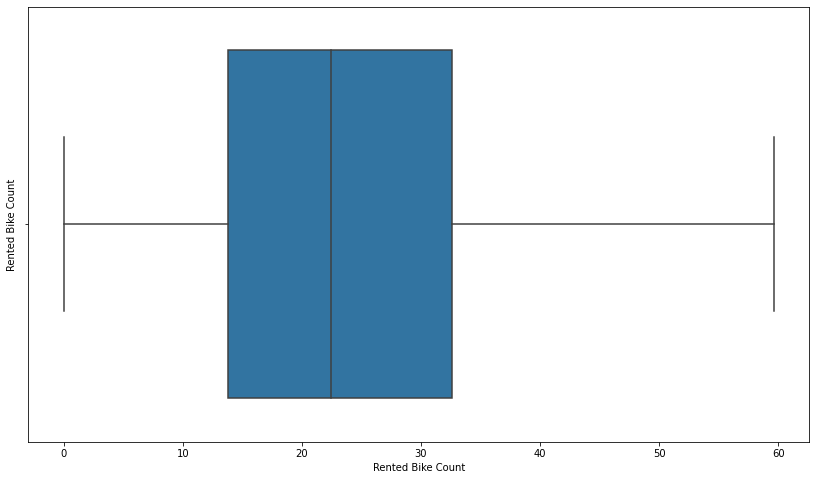

In [ ]:
plt.figure(figsize=(14,8))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(Bike_Sharing_df['Rented Bike Count']))
plt.show()

**Threfore, from the above distplot we can conclude that after appying square root outliers are vanished.**

# **Verfying Collinearitiy Amongst Variables**

**Checking The Correlation by using Ordinary Least Squares (OLS)**

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [ ]:
import statsmodels.api as sm                       

**statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license.**

In [ ]:
#Assigning the X and Y values

X = Bike_Sharing_df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',                  #List of All Independent Variable
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]

Y = Bike_Sharing_df['Rented Bike Count']                                                     #Dependent Variable

Bike_Sharing_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


**Now fitting the OLS model**

In [ ]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        04:28:44   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature(°C)              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity(%)                 -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind speed (m/s)             52.4810      5.661      9.271      0.000      41.385      63.577
Visibility (10m)             -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew point temperature(°C)    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar Radiation (MJ/m2)    -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall(mm)                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall (cm)                41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



*   **Omnibus test is a statistical test implemented on overall hypothesis that tends to find general significance between parameter variance. In simple term, Omnibus tests the skewness.**

*   **So, as the Omnibus is high in our model, means that our model is highly skewed.**

*    **R square and Adjusted square are almost identical.**

*    **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems.**

*    ***Durbin-Watson statistic is used to test for the presence of autocorrelation in the errors of a regression model.***

*    **Autocorrelation means that the errors of adjacent observations are correlated. If the errors are correlated, then least-squares regression can underestimate the standard error of the coefficients. Underestimated standard errors can make your predictors seem to be significant when they are not.**

*     **Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.**



In [ ]:
X.corr()

,const,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature(°C),NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000




*   **From the OLS model we find that the 'Temperature' and 'Dew_point_temperature' are highly correlated so we need to drop one of them**

*   **For droping the we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column**






# **Heatmap**

**Heatmap is most commonly use to check the correlation between variables.it is graphical representation of correlation matrix representing correlation between different variables**

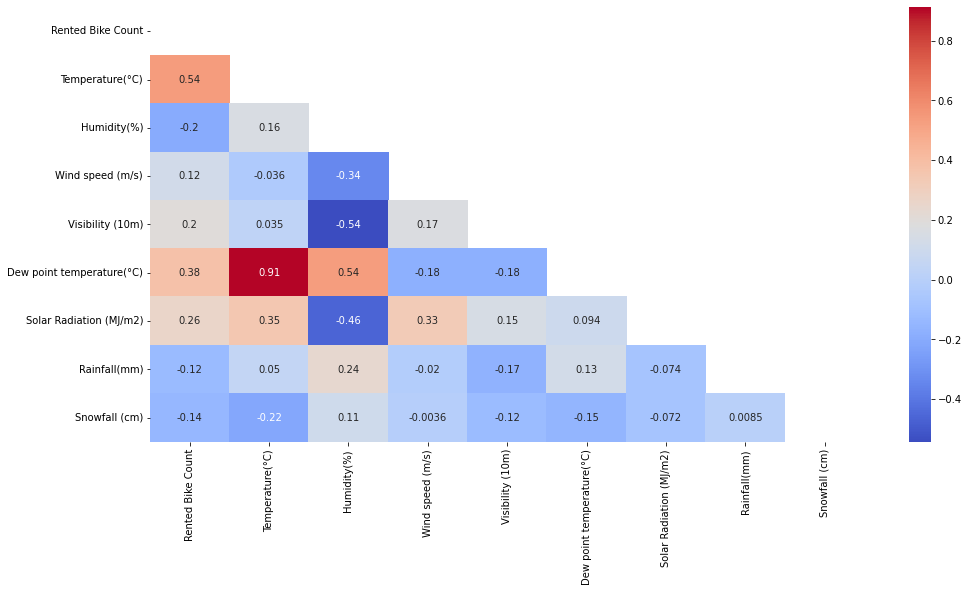

In [ ]:
plt.figure(figsize=(16,8))
correlation=Bike_Sharing_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')



*   **By studying the above plot we can say that Dew point temperature , Solar Radiation as well as Temperature are positively related to Target variable. This means if any of these variable increases the Target variable will also increase.**


*   **While, Humidity and Rainfall are neagatively correlated meaning that Target variable will decrease with increase in these variables.**

*    **From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.**





**Dropping the unwanted Columns.**

In [ ]:
# We'll Drop Dew Point Temprature

Bike_Sharing_df=Bike_Sharing_df.drop(['Dew point temperature(°C)'],axis=1)

In [ ]:
Bike_Sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays_weekend         8760 non-null   category
dtypes: categ

# **Create the dummy variables**

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables**

In [ ]:
categorical_features=list(Bike_Sharing_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

# **One Hot Encoding Method**



*   **One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.**

*   **A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**



In [ ]:
Bike_Sharing_df_copy = Bike_Sharing_df
  

In [ ]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

In [ ]:
for col in categorical_features:
    Bike_Sharing_df_copy = one_hot_encoding(Bike_Sharing_df_copy, col)
Bike_Sharing_df_copy.head() 

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


# **Machine Learning Model Training**

## **Doing TRAIN TEST SPLIT for Regression**


*    **The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.**

*    **Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data.** 

*     **The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively.** 

*      **In this step we will split our data into training and testing set using scikit learn library.**

In [ ]:
X = Bike_Sharing_df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(Bike_Sharing_df_copy['Rented Bike Count'])

In [ ]:
X.head(10)

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.00,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
5,-6.4,37,1.5,2000,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
6,-6.6,35,1.3,2000,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
7,-7.4,38,0.9,2000,0.00,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
8,-7.6,37,1.1,2000,0.01,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
9,-6.5,27,0.5,1928,0.23,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head(10)

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
5    10.000000
6    13.453624
7    21.447611
8    30.495901
9    22.135944
Name: Rented Bike Count, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(f'Shape of X training dataset is {X_train.shape}')
print(f'Shape of X training dataset is {X_test.shape}')

Shape of X training dataset is (6570, 47)
Shape of X training dataset is (2190, 47)


* **The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.**

* **Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).**

* **Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.**

* **R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.**




# **LINEAR REGRESSION**

**Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line**

**Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.**

**Some basic assumptions that must be fulfilled before implementing this algorithm are:**



*   **No multicollinearity in the dataset.**

*   **Independent variables should show linear relationship with dv.**


* **Residual mean should be 0 or close to 0.**

*  **There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.**

**We'll now implement our model using Linear Regression from SCI-KIT learn Library.**

In [ ]:
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)         #Checking the score

0.7722101548255267

In [ ]:
reg.coef_                           #Checking the Coefficent

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [ ]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

## **Training Data**

In [ ]:
#MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#R2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)

#Adjusted R2
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288189293
RMSE : 5.9226271942350825
MAE : 4.474024092996787
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


## **Now, storing these metric values in our dataframe and we'll use them later for further comparisons.**

In [ ]:
Dict_1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(Dict_1,index=[1])

# **Testing Data**

In [ ]:
#MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_lr)

#RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#R2
r2_lr= r2_score(y_test, y_pred_test)
print("R2 :",r2_lr)

#Adjusted R2
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.410178475318181
R2 : 0.7893518482962683
Adjusted R2 : 0.7847297833429184


**The r2_score for the testing data set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is any heteroscedasticity(unequal variance or scatter).**

# **Now, storing these metric values in our dataframe and we'll use them later for further comparisons.**

In [ ]:
Dict_2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(Dict_2,index=[1])

* **Heteroscedasticity refers to data for which the variance of the dependent variable is unequal across the range of independent variables.** 

* **Heteroscedasticity is the opposite of homoscedasticity. The heteroscedasticity of data is important in the context of regression analysis. A regression model assumes a consistent variance, or homoscedasticity, across the data.** 

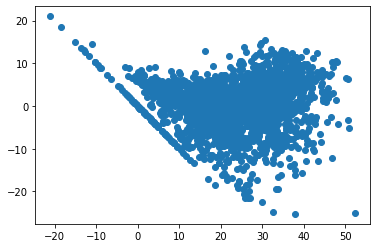

In [ ]:
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

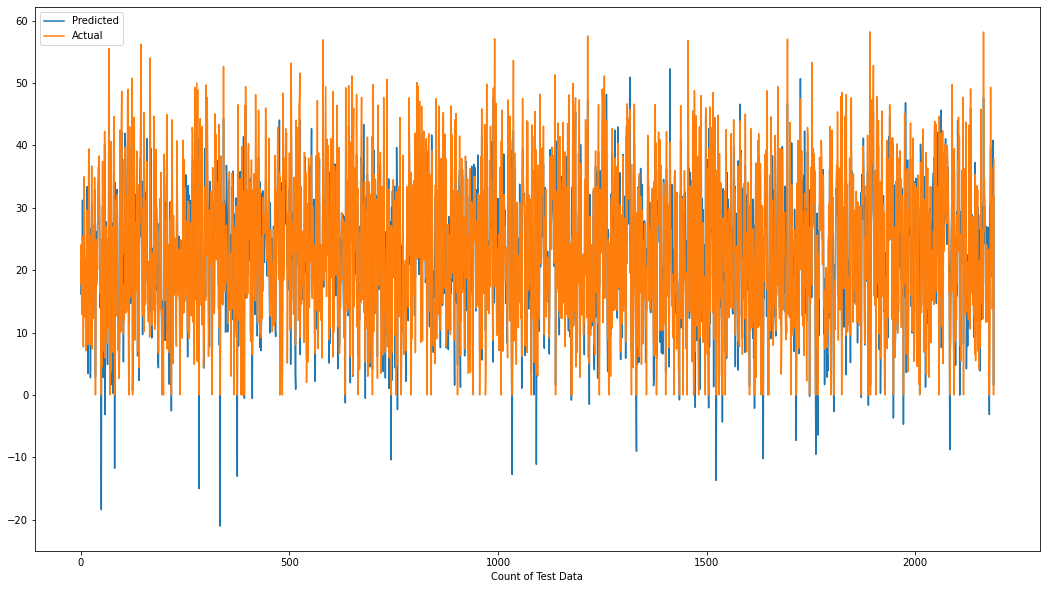

In [ ]:

plt.figure(figsize=(18,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Count of Test Data')
plt.show()

# **LASSO REGRESSION**

* **Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.**

* **So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.** 

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(f'Lasso score for test dataset is {lasso.score(X_test, y_test)}, and for Training dataset is  {lasso.score(X_train, y_train)}')

Lasso score for test dataset is 0.3873692800799008, and for Training dataset is  0.40519624904934015


In [ ]:
# Getting the predicted value of DV for comparing with Actual.

y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

**For Training Data**

In [ ]:
#MSE
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_lasso)

#RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

#MAE
MAE_lasso= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso)

#R2
r2_lasso= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_lasso)

#Adjusted R2
Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


**Our R2 score is 0.40 meaning our model was not able to capture most of the Variance.**

In [ ]:
Dict_1={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),3),
       'MSE':round((MSE_lasso),3),
       'RMSE':round((RMSE_lasso),3),
       'R2_score':round((r2_lasso),3),
       'Adjusted R2':round((Adjusted_R2_lasso ),2)
       }
training_df=training_df.append(Dict_1,ignore_index=True)

**For Testing Data**

In [ ]:
#MSE
MSE_lasso= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_lasso)

#RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

#MAE
MAE_lasso= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso)

#R2
r2_lasso= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2_lasso)

#Adjusted R2
Adjusted_R2_lasso = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


**The r2_score for the test set is 0.38. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
Dict_2={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),3),
       'MSE':round((MSE_lasso),3),
       'RMSE':round((RMSE_lasso),3),
       'R2_score':round((r2_lasso),3),
       'Adjusted R2':round((Adjusted_R2_lasso ),2)
       }
training_df=training_df.append(Dict_2,ignore_index=True)

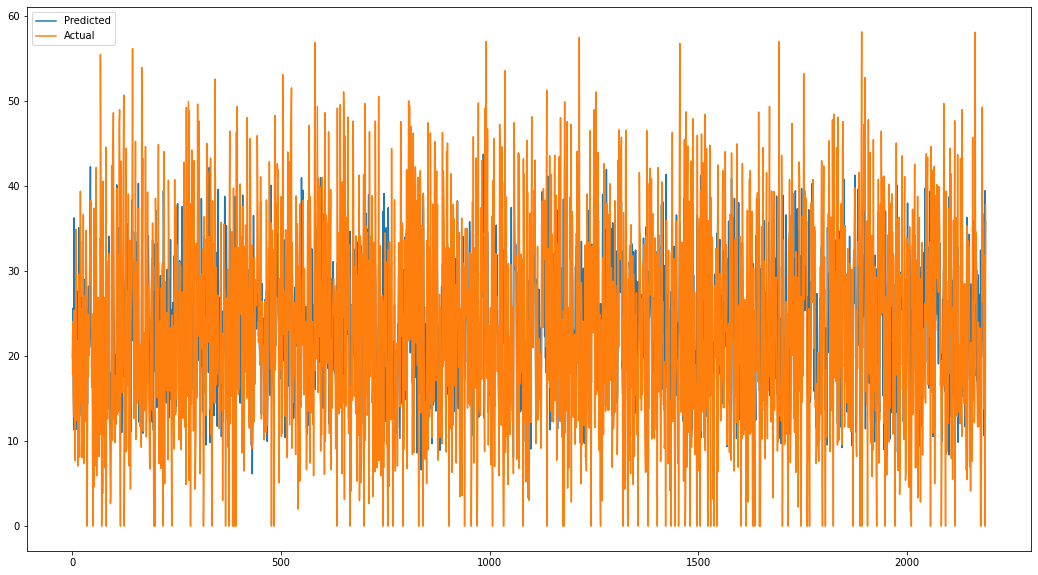

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

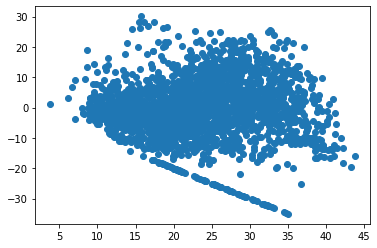

In [ ]:
###FInding Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# **RIDGE REGRESSION**

**Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.**

In [ ]:
ridge= Ridge(alpha=0.1)

#FIT THE MODEL
ridge.fit(X_train,y_train)

#check the score
ridge.score(X_train, y_train)


0.7722100789802107

In [ ]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

**For Training Data**

In [ ]:
#MSE
MSE_ridge= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_ridge)

#RMSE
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)

#MAE
MAE_ridge= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_ridge)

#R2
r2_ridge= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_ridge)

#Adjusted R2
Adjusted_R2_ridge = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125378
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


**As our R2 score is now at 0.77, meaning our model was able to capture most of the vaiance.**

In [ ]:
# Saving the dataframe for future comparions
Dict_1={'Model':'Ridge regression ',
       'MAE':round((MAE_ridge),3),
       'MSE':round((MSE_ridge),3),
       'RMSE':round((RMSE_ridge),3),
       'R2_score':round((r2_ridge),3),
       'Adjusted R2':round((Adjusted_R2_ridge ),2)}
training_df=training_df.append(Dict_1,ignore_index=True)

# **For Testing Data**

In [ ]:
#MSE
MSE_ridge= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE_ridge)

#RMSE
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)

#MAE
MAE_ridge= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge)

#R2
r2_ridge= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2_ridge)

#Adjusted R2
Adjusted_R2_ridge = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539515
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


**The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
Dict_2={'Model':'Ridge regression ',
       'MAE':round((MAE_ridge),3),
       'MSE':round((MSE_ridge),3),
       'RMSE':round((RMSE_ridge),3),
       'R2_score':round((r2_ridge),3),
       'Adjusted R2':round((Adjusted_R2_ridge ),2)}
test_df=test_df.append(Dict_2,ignore_index=True)

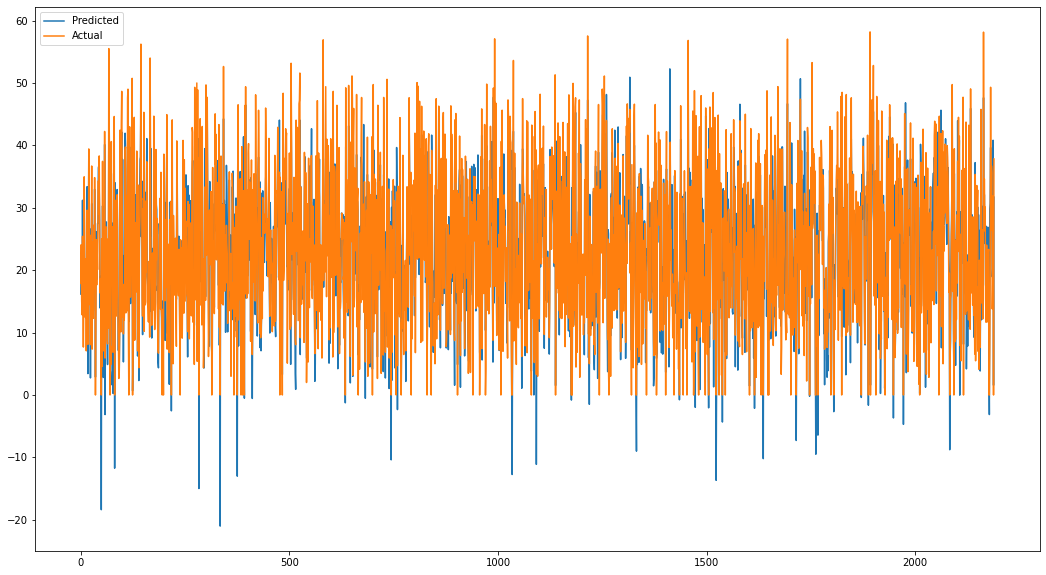

In [ ]:

plt.figure(figsize=(18,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

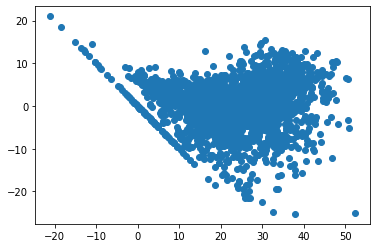

In [ ]:
#Plotting for Hetroscadasity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **ELASTIC NET REGRESSION**

**Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.**

In [ ]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#fitting the model

elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#Chechking the score

elasticnet.score(X_train, y_train)

0.6261189054494012

In [ ]:
y_pred_train_EN=elasticnet.predict(X_train)
y_pred_test_EN=elasticnet.predict(X_test)

# **For Training Data**

In [ ]:
#MSE
MSE_EN= mean_squared_error((y_train), (y_pred_train_EN))
print("MSE :",MSE_EN)

#RMSE
RMSE_EN=np.sqrt(MSE_EN)
print("RMSE :",RMSE_EN)

#MAE
MAE_EN= mean_absolute_error(y_train, y_pred_train_EN)
print("MAE :",MAE_EN)

#R2
r2_EN= r2_score(y_train, y_pred_train_EN)
print("R2 :",r2_EN)

#Adjusted R2
Adjusted_R2_EN = (1-(1-r2_score(y_train, y_pred_train_EN))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_EN))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.5742035398887
RMSE : 7.587766703048315
MAE : 5.792276538970546
R2 : 0.6261189054494012
Adjusted R2 : 0.6179151652795234


**As, our r2 score value is 0.62 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [ ]:
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_EN),3),
       'MSE':round((MSE_EN),3),
       'RMSE':round((RMSE_EN),3),
       'R2_score':round((r2_EN),3),
       'Adjusted R2':round((Adjusted_R2_EN ),2)}
training_df=training_df.append(dict1,ignore_index=True)

# **Testing Dataset**

In [ ]:
#MSE
MSE_EN= mean_squared_error((y_test), (y_pred_test_EN))
print("MSE :",MSE_EN)

#RMSE
RMSE_EN=np.sqrt(MSE_EN)
print("RMSE :",RMSE_EN)

#MAE
MAE_EN= mean_absolute_error(y_test, y_pred_test_EN)
print("MAE :",MAE_EN)

#R2
r2_EN= r2_score(y_test, y_pred_test_EN)
print("R2 :",r2_EN)

#Adjusted R2
Adjusted_R2_EN = (1-(1-r2_score(y_test, y_pred_test_EN))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_EN))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.45120536350042
RMSE : 7.710460775044538
MAE : 5.873612334800099
R2 : 0.6236465216363589
Adjusted R2 : 0.6153885321484546


**The r2_score for the test set is 0.86. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
Dict_2={'Model':'Elastic net regression ',
       'MAE':round((MAE_EN),3),
       'MSE':round((MSE_EN),3),
       'RMSE':round((RMSE_EN),3),
       'R2_score':round((r2_EN),3),
       'Adjusted R2':round((Adjusted_R2_EN ),2)}
test_df=test_df.append(Dict_2,ignore_index=True)

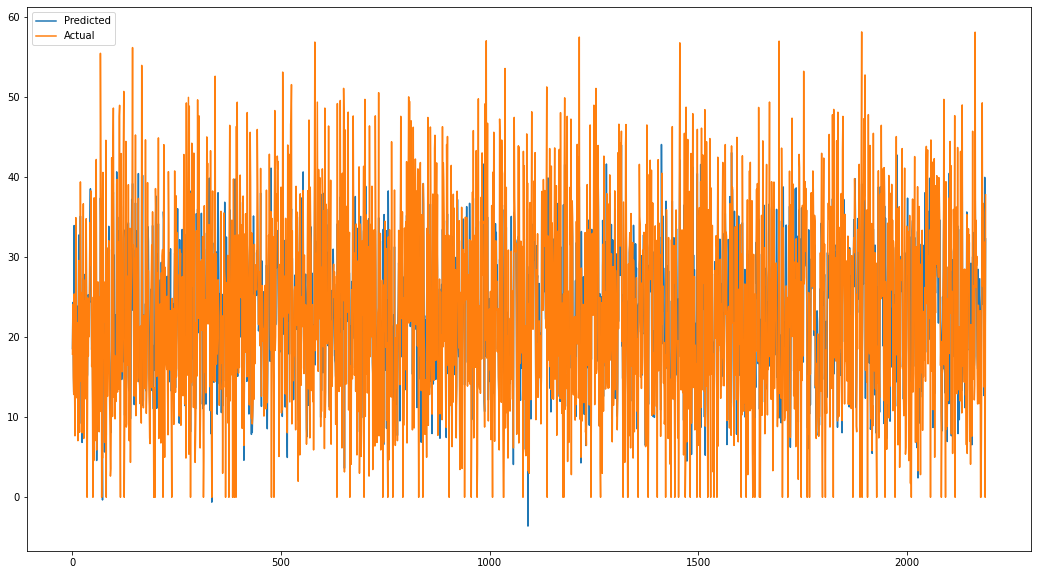

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(np.array(y_pred_test_EN))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

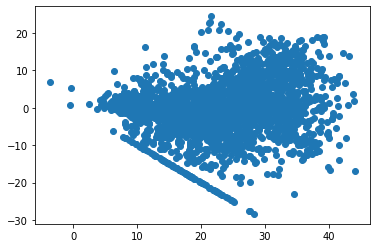

In [ ]:
# For Heteroscadasity

plt.scatter((y_pred_test_EN),(y_test)-(y_pred_test_EN))

# **DECISION TREE**

In [ ]:
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
y_pred_train_DT = decision_regressor.predict(X_train)
y_pred_test_DT = decision_regressor.predict(X_test)

# **For Training Data**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.6837272509634158
MSE : 48.703055309709214
RMSE : 6.978757433075692
MAE : 5.1518679681097845
R2 : 0.6837272509634158
Adjusted R2 : 0.6767875594579446


Looks like our r2 score value is 0.69 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 53.0818109826069
RMSE : 7.2857265240061615
MAE : 5.398520827276675
R2 : 0.6639677180807764
Adjusted R2 : 0.6565944607277402


**The r2_score for the test set is 0.65. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

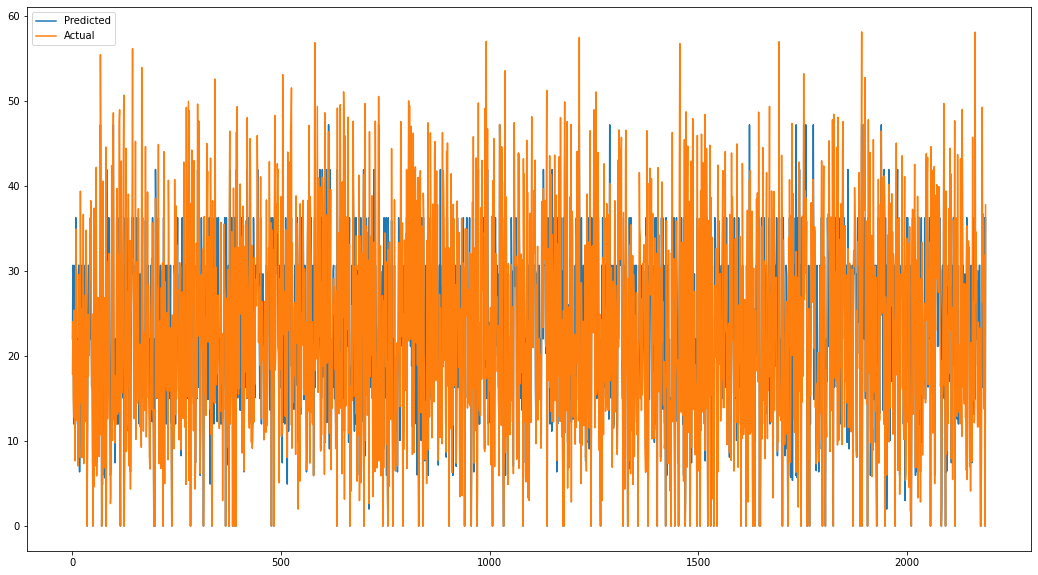

In [ ]:
#Plot the figure
plt.figure(figsize=(18,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

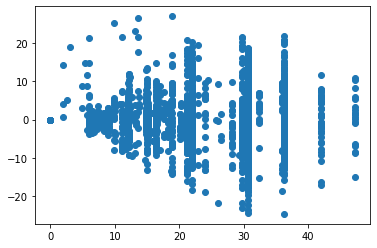

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

# **RANDOM FOREST**

**Random Forest is a robust machine learning algorithm that can be used for a variety of tasks including regression and classification. It is an ensemble method, meaning that a random forest model is made up of a large number of small decision trees, called estimators, which each produce their own predictions. The random forest model combines the predictions of the estimators to produce a more accurate prediction.**

In [ ]:
#Creating Random Forest Regressor instance

rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions for training and testing dataset

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

# **For Training Data**

In [ ]:
print("Model Score:",rf_model.score(X_train,y_train))

#MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

#R2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)

#Adjusted r2
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.989681110521911
MSE : 1.5890127951808168
RMSE : 1.2605605083377858
MAE : 0.8028396101561002
R2 : 0.989681110521911
Adjusted R2 : 0.9894546923120743


**It can be seen that R2 score is 0.98 meaning our model has captured most of the variance.**

In [ ]:
Dict_1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(Dict_1,ignore_index=True)

# **For Testing Data**

In [ ]:
print("Model Score:",rf_model.score(X_test,y_test))

#MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

#R2
r2_rf= r2_score(y_test, y_pred_test_r)
print("R2 :",r2_rf)

#Adjusted r2
Adjusted_R2_rf=(1-(1-r2_score(y_test, y_pred_test_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9193142604057163
MSE : 12.745636084943644
RMSE : 3.5701030916408625
MAE : 2.2123007513220556
R2 : 0.9193142604057163
Adjusted R2 : 0.9175438450177932


**As the R2 score for test dataset is 0.91, this means that our model is performing well on the data.**

In [ ]:
Dict_2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(Dict_2,ignore_index=True)

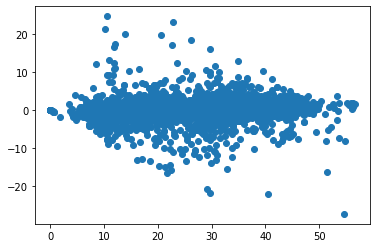

In [ ]:
## Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature(°C),0.32
1,Humidity(%),0.16
34,Functioning Day_Yes,0.15
5,Rainfall(mm),0.04
10,Hour_4,0.03
4,Solar Radiation (MJ/m2),0.03
24,Hour_18,0.03
11,Hour_5,0.03
25,Hour_19,0.02
46,weekdays_weekend_1,0.02


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

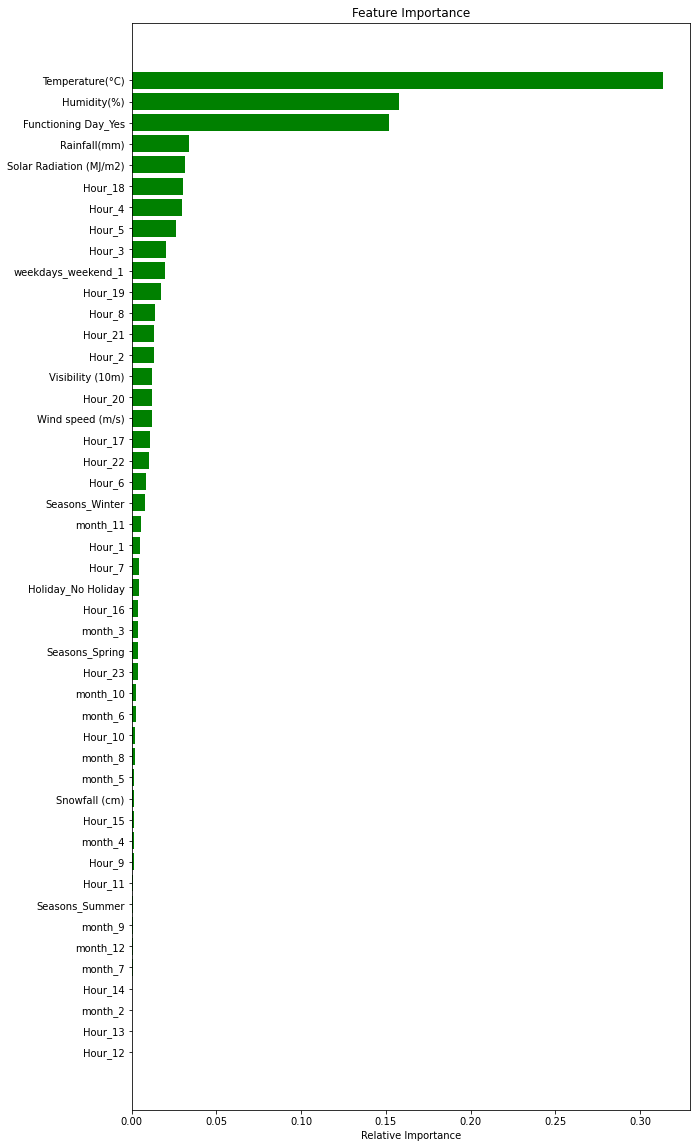

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='Green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

* **Gradient boosting is a machine learning technique for regression and classification problems that produce a prediction model in the form of an ensemble of weak prediction models. This technique builds a model in a stage-wise fashion and generalizes the model by allowing optimization of an arbitrary differentiable loss function. Gradient boosting basically combines weak learners into a single strong learner in an iterative fashion. As each weak learner is added, a new model is fitted to provide a more accurate estimate of the response variable. The new weak learners are maximally correlated with the negative gradient of the loss function, associated with the whole ensemble. The idea of gradient boosting is that you can combine a group of relatively weak prediction models to build a stronger prediction model.**

* **It is a very powerful technique for building predictive models. Gradient boosting is applicable to many different risk functions and optimizes prediction accuracy of those functions, which is an advantage to conventional fitting methods.**



In [ ]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

#Fitting the model
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

# **Train Data**

In [ ]:
print("Model Score:",gb_model.score(X_train,y_train))

#MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)

#R2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)

#Adjusted r2
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8789016499095264
MSE : 18.648017131847947
RMSE : 4.318334995324928
MAE : 3.2690035692731247
R2 : 0.8789016499095264
Adjusted R2 : 0.8762444965695393


**Our r2 score value is 0.87 that means our model is able to capture most of the data variance**

In [ ]:
Dict_1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(Dict_1,ignore_index=True)

# **Test Data**

In [ ]:
print("Model Score:",gb_model.score(X_test,y_test))

#MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)

#R2
r2_gb= r2_score(y_test, y_pred_test_g)
print("R2 :",r2_gb)

#Adjusted r2
Adjusted_R2_gb = (1-(1-r2_score(y_test, y_pred_test_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8652280396863457
MSE : 21.289441842508694
RMSE : 4.6140483138463875
MAE : 3.492858786559992
R2 : 0.8652280396863457
Adjusted R2 : 0.8622708584843187


**As the R2 score is 0.86 our model is performing well on dataset**

In [ ]:
Dict_2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(Dict_2,ignore_index=True)

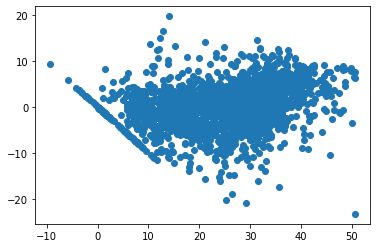

In [ ]:
## Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature(°C),0.32
34,Functioning Day_Yes,0.17
1,Humidity(%),0.13
5,Rainfall(mm),0.07
4,Solar Radiation (MJ/m2),0.05
32,Seasons_Winter,0.03
24,Hour_18,0.03
10,Hour_4,0.03
11,Hour_5,0.02
27,Hour_21,0.02


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)               

**numpy.argsort() function is used to perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as arr that that would sort the array.**

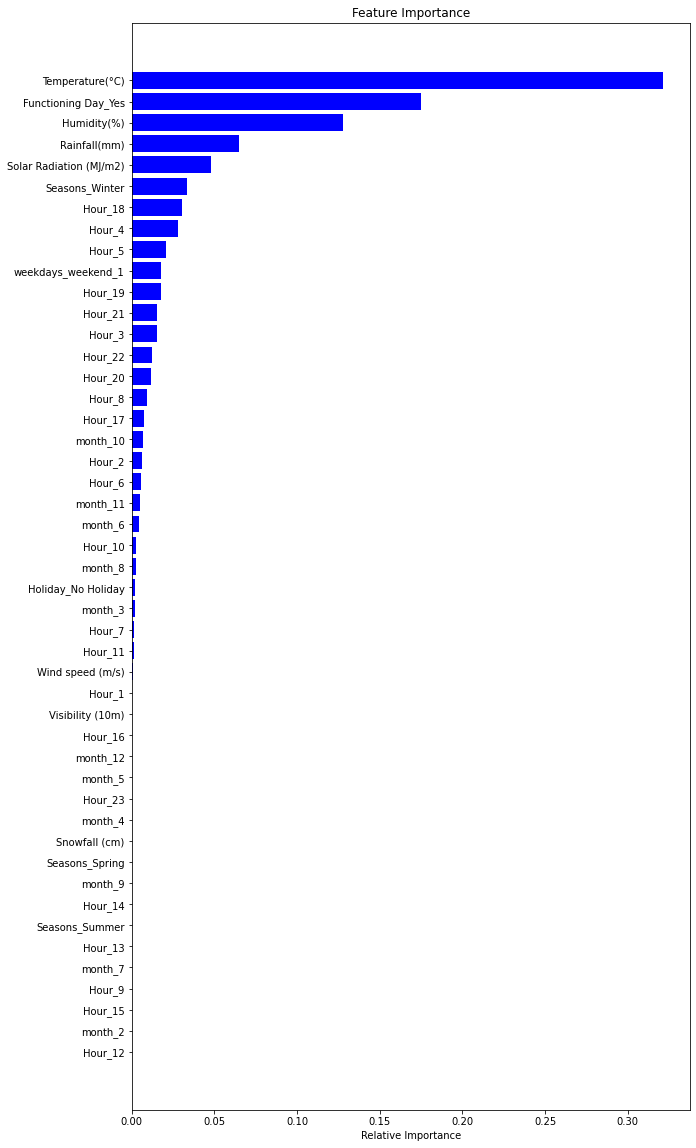

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **HYPERPARAMETER TUNING**

**Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.**

* **Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm.** 

* **A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning**.

# **Using GridSearchCV**

**GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.**

## **Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

## **Importing Gradient Boosting Regressor**

In [ ]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

# **Train Set**

In [ ]:
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9515896672300013
MSE : 7.454740004128373
RMSE : 2.7303369762958516
MAE : 1.8489194833919358
R2 : 0.9515896672300013
Adjusted R2 : 0.9505274423746372


In [ ]:
Dict_1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(Dict_1,ignore_index=True)

# **Test Set**

In [ ]:
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.393403249345436
RMSE : 3.5204265720712646
MAE : 2.400740795687882
R2 : 0.921544056287242
Adjusted R2 : 0.9198225673262245


In [ ]:
Dict_2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(Dict_2,ignore_index=True)

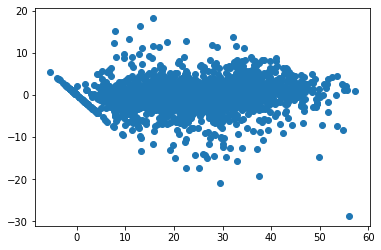

In [ ]:
## Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

array([3.12057438e-01, 1.52960270e-01, 6.20316780e-03, 6.03743312e-03,
       3.75324776e-02, 4.41384879e-02, 1.25380735e-03, 9.51937002e-04,
       9.98653930e-03, 1.96911560e-02, 2.89529919e-02, 2.45449359e-02,
       6.18872117e-03, 3.32550727e-03, 1.20634772e-02, 4.66509851e-04,
       3.73626049e-03, 2.06003352e-03, 6.36119042e-05, 1.39325973e-04,
       9.77140091e-05, 5.27337742e-04, 1.33847427e-03, 9.51593158e-03,
       3.11372494e-02, 1.65223193e-02, 1.21776066e-02, 1.44682226e-02,
       9.91879886e-03, 2.41023598e-03, 3.62345860e-03, 1.06796008e-03,
       1.63029331e-02, 2.18064007e-03, 1.57198472e-01, 7.75938658e-05,
       1.30043275e-03, 1.32742892e-04, 1.66051097e-03, 2.73793528e-03,
       1.57366588e-03, 6.25315399e-03, 7.62045639e-05, 6.35447256e-03,
       4.56464936e-03, 1.05534757e-03, 2.33718468e-02])

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.head()

,Feature,Feature Importance
0,Temperature(°C),0.31
1,Humidity(%),0.15
2,Wind speed (m/s),0.01
3,Visibility (10m),0.01
4,Solar Radiation (MJ/m2),0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature(°C),0.31
34,Functioning Day_Yes,0.16
1,Humidity(%),0.15
4,Solar Radiation (MJ/m2),0.04
5,Rainfall(mm),0.04
10,Hour_4,0.03
24,Hour_18,0.03
32,Seasons_Winter,0.02
25,Hour_19,0.02
11,Hour_5,0.02


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:

features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

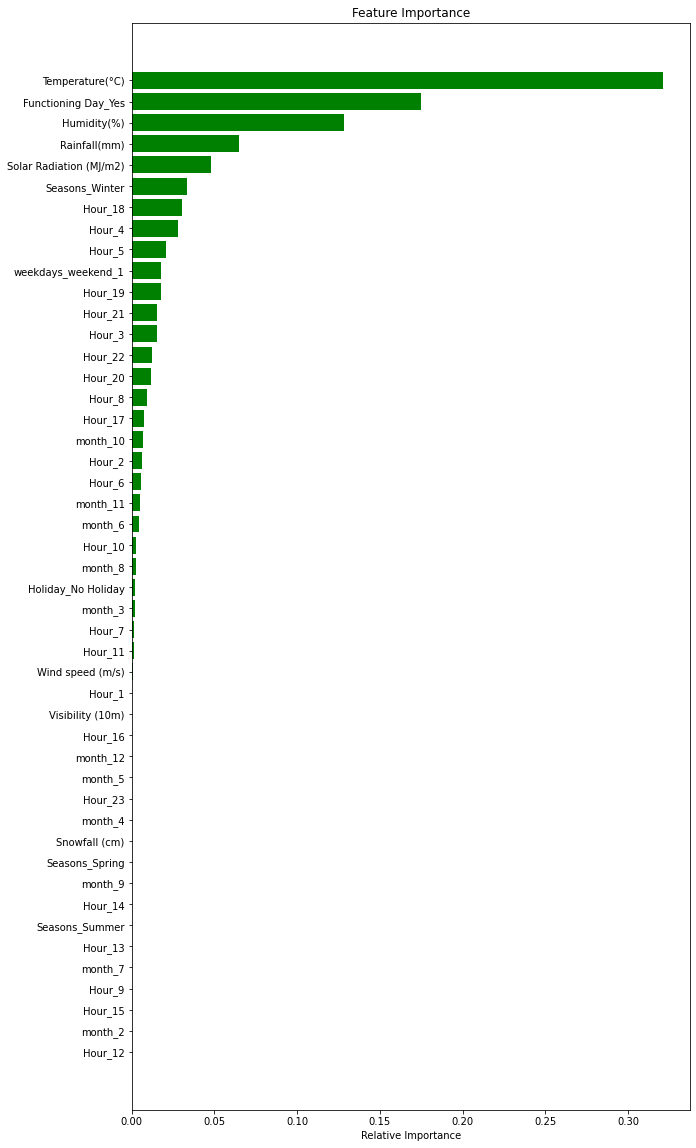

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **CONCLUSION**

**During the time of our analysis, we initially did EDA on all the features of our datset.** 

* **We first analysed our dependent variable, 'Rented Bike Count' and also transformed it.** 
* **Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**

* **Further, we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:**

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE  ...  R2_score  Adjusted R2
Training set 0               Linear regression   4.474  ...     0.772         0.77
             1                Lasso regression   7.255  ...     0.405         0.39
             2                Lasso regression   7.456  ...     0.387         0.37
             3                Ridge regression   4.474  ...     0.772         0.77
             4          Elastic net regression   5.792  ...     0.626         0.62
             5        Dicision tree regression   5.152  ...     0.684         0.68
             6        Random forest regression   0.803  ...     0.990         0.99
             7    Gradient boosting regression   3.269  ...     0.879         0.88
             8  Gradient Boosting gridsearchcv   1.849  ...     0.952         0.95
Test set     0               Linear regression   4.410  ...     0.789         0.78
             1                Ridge regression   4.410  ...     0.789         0.78
             2          Elastic net regression   5.874  ...     0.624         0.62
             3        Dicision tree regression   5.399  ...     0.664         0.66
             4        Random forest regression   2.212  ...     0.919         0.92
             5    Gradient boosting regression   3.493  ...     0.865         0.86
             6  Gradient Boosting gridsearchcv   2.401  ...     0.922         0.92

[16 rows x 6 columns]

* **Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.**

* **Feature Importance value for Random Forest and Gradient Boost are different.**

* **No overfitting is observed.**

* **This model can be deployed**